In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from trees import Tree, kNT, TPT

In [5]:
def get_canonical_label(tree, node, subtree_dict, current_label_dict):
    '''Get the canonical label for the subtree rooted at the given node.'''
    tree.sort_tree(node)
    children = tree.chi(node)
    if not children:
        subtree_form = (tree.node_labels[node]['name'],)
    else:
        subtree_form = (tree.node_labels[node]['name'], tuple(get_canonical_label(tree, child, subtree_dict, current_label_dict) for child in children))

    if subtree_form not in subtree_dict:
        subtree_dict[subtree_form] = current_label_dict['current_label']
        current_label_dict['current_label'] += 1

    return subtree_dict[subtree_form]

def canonize_tree(tree, subtree_dict, current_label_dict):
    '''Canonize the tree and return the canonical form of the root node and the dictionary of subtrees.'''
    canonical_form = get_canonical_label(tree, tree.root, subtree_dict, current_label_dict)
    return canonical_form, subtree_dict

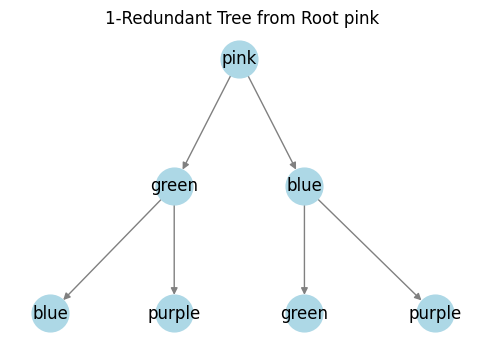

Tree Structure:
Parent: pink
Children: ['green', 'blue']
--------------------
Parent: green
Children: ['blue', 'purple']
--------------------
Parent: blue
Children: ['green', 'purple']
--------------------
Parent: blue
No Children
--------------------
Parent: purple
No Children
--------------------
Parent: green
No Children
--------------------
Parent: purple
No Children
--------------------


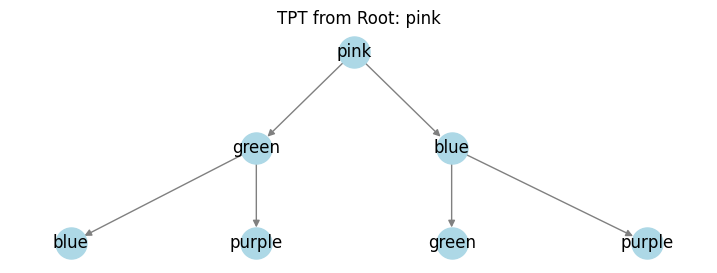

Tree Structure:
Parent: pink
Children: ['green', 'blue']
--------------------
Parent: green
Children: ['blue', 'purple']
--------------------
Parent: blue
Children: ['green', 'purple']
--------------------
Parent: blue
No Children
--------------------
Parent: purple
No Children
--------------------
Parent: green
No Children
--------------------
Parent: purple
No Children
--------------------
{('green',): 0, ('purple',): 1, ('blue', (0, 1)): 2, ('blue',): 3, ('green', (3, 1)): 4, ('pink', (2, 4)): 5}
{('green',): 0, ('purple',): 1, ('blue', (0, 1)): 2, ('blue',): 3, ('green', (3, 1)): 4, ('pink', (2, 4)): 5}
5
5
True


In [6]:
# Create the adjacency list for the graph
adjacency_list = {
    'pink': ['green', 'blue'],
    'green': ['blue', 'purple'],
    'blue': ['purple'],
    'purple': []
}

# Initialize the graph and convert to two-direction adjacency list
G = nx.Graph()
# Add edges to the graph using a for loop
for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Set parameters for kNT
w = 'pink'
h = 2
k = 1

# Build 1-NT from graph
T1 = kNT(G, w, k, h)
T1.plot_tree()
T1.print_tree()

# Build TPT from graph
T2 = TPT(G, w, h)
T2.plot_tree()
T2.print_tree()

# Canonize both trees and compare
shared_subtree_dict = {}
current_label_dict = {'current_label': 0}
tc1, shared_subtree_dict = canonize_tree(T1, shared_subtree_dict, current_label_dict)
print(shared_subtree_dict)
tc2, shared_subtree_dict = canonize_tree(T2, shared_subtree_dict, current_label_dict)
print(shared_subtree_dict)
print(tc1)
print(tc2)
print(tc1 == tc2) # Returns True